<a href="https://colab.research.google.com/github/kritika-gupta/IE406-machine-learning/blob/main/assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PCA for feature Extraction

1. samples = 400
2. features = 10305

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import h5py
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
f = h5py.File('/content/drive/My Drive/faceimages.mat')
f.keys()
data = f['data']
print(data.shape)
data = data[:-1, :]
print(data.shape)

(10305, 400)
(10304, 400)


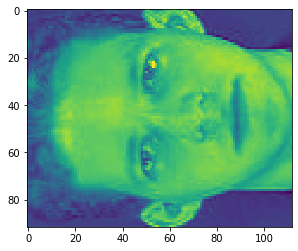

In [ ]:
plt.imshow(np.array(data)[:, 0].reshape(92,112))

In [ ]:
data = data.T
# mean subtract the data
data = data - np.mean(data, axis = 0)
print(data.shape)
np.mean(data, axis = 0).shape

(400, 10304)


(10304,)

In [ ]:
cov = np.cov(data.T)
cov.shape

(10304, 10304)

In [ ]:
[eig,U] = np.linalg.eig(cov)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


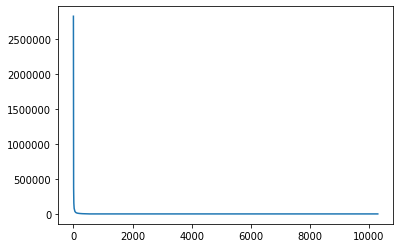

In [ ]:
plt.figure()
plt.plot(eig)

In [ ]:
U = U.astype('float')
U.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


(10304, 10304)

In [ ]:
A = U.T
X = data.T
print(A.shape, X.shape)
Y = A@X
print(Y.shape)

(10304, 10304) (10304, 400)
(10304, 400)


In [ ]:
 def PCA(X, Y, U, comp):
  Yt = Y[:comp,:]
  Ut = U[:,:comp]
  print(Ut.shape, Yt.shape)

  Xr = np.matmul(Ut, Yt)
  print("reconstructed shape = ", Xr.shape)
  mse = np.sqrt(np.sum((X-Xr)**2))
  print("error=",mse)
  X1r = np.reshape(Xr[:, 0],[92, 112])
  plt.imshow(X1r)
  plt.colorbar()

## Reconstruction of image

(10304, 50) (50, 400)
reconstructed shape =  (10304, 400)
error= 34296.5403835362


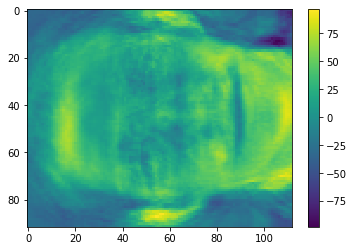

In [ ]:
PCA(X, Y, U, 50)

(10304, 100) (100, 400)
reconstructed shape =  (10304, 400)
error= 26435.891108241343


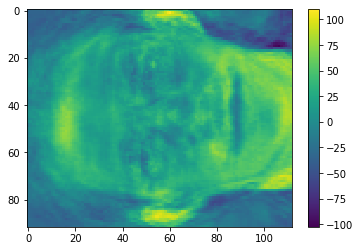

In [ ]:
PCA(X, Y, U, 100)

(10304, 200) (200, 400)
reconstructed shape =  (10304, 400)
error= 16991.734064000575


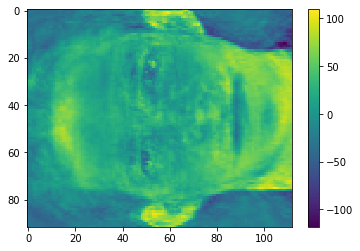

In [ ]:
PCA(X, Y, U, 200)

(10304, 300) (300, 400)
reconstructed shape =  (10304, 400)
error= 9694.484220319562


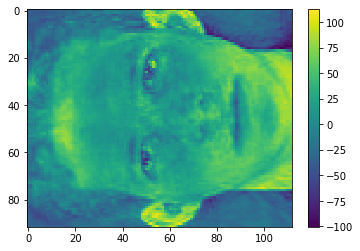

In [ ]:
PCA(X, Y, U, 300)

(10304, 400) (400, 400)
reconstructed shape =  (10304, 400)
error= 3.9727418989557174e-09


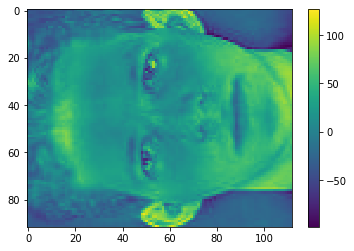

In [ ]:
PCA(X, Y, U, 400)

(10304, 700) (700, 400)
reconstructed shape =  (10304, 400)
error= 3.973257409188853e-09


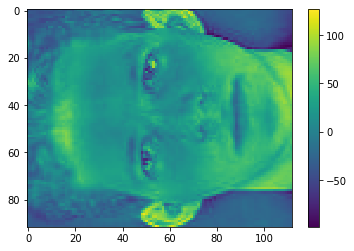

In [ ]:
PCA(X, Y, U, 700)